# Content-based similarities
This notebook shows the process used to calculate similarities among the informative videos maintained by the +TV4E platform. In addition, a 2D-graph shows how these items are arranged in the vector space. Thi script must be run in an offline mode to calculate the similarities. 

Library requirements:
* Pandas
* NumPy
* Scikit-learn 
* NLTK (w/ portuguese stop words)
* Seaborn 
* Matplotlib

In [1]:
# for Python 2: use print only as a function
from __future__ import print_function

### Part 1 - Examine the data

In [2]:
# read CSV using a relative path
import pandas as pd
import requests
URL='http://api_mysql.tv4e.pt/api/recommendations/videos'
data= requests.get(URL)
df_videos=pd.DataFrame(data.json())

In [3]:
# examine the shape of the dataframe
df_videos.shape

(391, 8)

In [4]:
# examine the first rows
df_videos

,video_asgie_id,video_asgie_title_en,video_asgie_title_pt,video_date_creation,video_desc,video_id,video_location,video_title
0,3,Financial Services,Finanças,2017-09-26 15:21:16,Seja qual for o cenário para os escalões do IR...,4049,,As “habilidadezinhas” do Governo para descer o...
1,1,Health Care and Welfare Services,Saúde e Bem-Estar,2017-09-26 15:36:20,Mais pessoas recorrem aos centros de saúde par...,4051,,Deixar de fumar
2,1,Health Care and Welfare Services,Saúde e Bem-Estar,2017-09-26 15:38:36,Quase sete mil unidades de medicamentos apreen...,4053,,Medicamentos falsificados
3,1,Health Care and Welfare Services,Saúde e Bem-Estar,2017-09-26 15:40:12,Ministro da Saúde participa no encontro em Coi...,4054,,Conferência Mundial de Saúde Urbana
4,1,Health Care and Welfare Services,Saúde e Bem-Estar,2017-09-26 15:40:19,Rastreio visa despiste da ambliopia em criança...,4055,,CHTS | Saúde visual infantil
5,6,Local Authority Services,Serviços Autárquicos,2017-09-26 15:40:25,A Câmara Municipal de Aveiro está a colocar re...,4057,,CÂMARA MUNICIPAL COLOCA RELVA SINTÉTICA
6,6,Local Authority Services,Serviços Autárquicos,2017-09-26 15:40:34,Na próxima quinta-feira terão início os trabal...,4058,,QUALIFICAÇÃO DA PONTE DE SÃO JOÃO
7,6,Local Authority Services,Serviços Autárquicos,2017-09-26 15:40:42,Foi assinado o Protocolo de Cooperação finance...,4059,,BANCO ALIMENTAR CONTRA A FOME | ASSINATURA DO ...
8,1,Health Care and Welfare Services,Saúde e Bem-Estar,2017-09-26 15:40:52,Implementação do sistema informático concluída...,4060,,VIH |SI.VIDA
9,1,Health Care and Welfare Services,Saúde e Bem-Estar,2017-09-26 15:41:00,Cientistas portugueses descobrem mecanismo da ...,4061,,Doença de Parkinson


In [5]:
# examine the class distribution and check percentages of ASGIE types
asgies = df_videos.video_asgie_title_pt.value_counts().to_frame()
asgies['percents'] = ""
asgies['percents'] = (asgies.video_asgie_title_pt/df_videos.shape[0])*100
asgies

,video_asgie_title_pt,percents
Saúde e Bem-Estar,176,45.012788
Serviços Autárquicos,113,28.900256
Cultura,55,14.066496
Finanças,29,7.416880
Segurança,18,4.603581


In [6]:
# show all lines in ASGIE 'Finanças'
df_videos_financas = df_videos[(df_videos.video_asgie_title_pt=='Finanças')]
df_videos_financas

,video_asgie_id,video_asgie_title_en,video_asgie_title_pt,video_date_creation,video_desc,video_id,video_location,video_title
0,3,Financial Services,Finanças,2017-09-26 15:21:16,Seja qual for o cenário para os escalões do IR...,4049,,As “habilidadezinhas” do Governo para descer o...
93,3,Financial Services,Finanças,2017-10-04 12:11:41,A Comissão Europeia quer o IVA a funcionar num...,4162,,Bruxelas quer acabar com a isenção de IVA nas ...
100,3,Financial Services,Finanças,2017-10-05 22:11:44,A troca automática de informações que agora se...,4169,,Dados bancários: o que fará o Fisco com tanta ...
105,3,Financial Services,Finanças,2017-10-06 14:14:48,"À medida que o tempo passa, o Governo vai cede...",4174,,Redução de IRS chega a cada vez mais gente
106,3,Financial Services,Finanças,2017-10-08 22:18:42,O antigo ministro das Finanças António Bagão F...,4177,,Bagão Félix defende reforma fiscal por sistema...
124,3,Financial Services,Finanças,2017-10-11 09:11:42,O Correio da Manhã publica hoje os escalões de...,4220,,"Novos escalões de IRS: 1,5 milhões de contribu..."
129,3,Financial Services,Finanças,2017-10-11 22:11:59,À luz da última proposta que o Governo colocou...,4225,,Descida do IRS abrange salários até 3.200 euro...
133,3,Financial Services,Finanças,2017-10-12 16:17:34,O Governo começou por só prometer a descida do...,4230,,O seu IRS baixa em 2018?
135,3,Financial Services,Finanças,2017-10-12 19:16:17,O Governo pretende baixar o IVA aplicável aos ...,4232,,Instrumentos musicais vão pagar menos IVA
136,3,Financial Services,Finanças,2017-10-12 23:11:41,O Fisco vai deixar de poder avançar com penhor...,4233,,Fisco impedido de penhorar recibos verdes de b...


### Part 2 - Vectorize text contents

In [7]:
# import and retrieve portuguese stop words
# stop words are not considered as token as usually they carry no meaning (!)
from nltk.corpus import stopwords
portuguese_stop_words = stopwords.words('portuguese')
portuguese_stop_words

['de',
 'a',
 'o',
 'que',
 'e',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera',
 'es

In [8]:
# import and instantiate TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=2, max_df=0.5, stop_words=portuguese_stop_words)

In [9]:
# fit (train) the vectorizer with the corpus from video text contents
tfidf_matrix = tfidf.fit_transform(df_videos.video_desc)
tfidf_matrix

<391x10726 sparse matrix of type '<class 'numpy.float64'>'
	with 54916 stored elements in Compressed Sparse Row format>

In [10]:
# show the size of the vocabulary
len(tfidf.vocabulary_)

10726

In [11]:
# show the vocabulary
tfidf.get_feature_names()

['00',
 '000',
 '000 00',
 '000 euros',
 '018',
 '018 2017',
 '06',
 '09',
 '10',
 '10 10saúdealarga',
 '10 aniversário',
 '10 anos',
 '10 horas',
 '10 meses',
 '10 mil',
 '10 milhões',
 '10 novembro',
 '10 outubro',
 '100',
 '100 aquisição',
 '100 mil',
 '102',
 '10h30',
 '10h30 fundação',
 '10saúdealarga',
 '10saúdealarga elenco',
 '11',
 '11 novembro',
 '11 outubro',
 '110',
 '112',
 '112 acordo',
 '112 instituto',
 '112 recorda',
 '113',
 '113 2011',
 '118',
 '12',
 '12 anos',
 '12 meses',
 '12 mil',
 '12 outubro',
 '120',
 '120 médicos',
 '125',
 '127',
 '13',
 '13 milhões',
 '13 novembro',
 '13 outubro',
 '130',
 '131',
 '131 2017',
 '14',
 '14 17',
 '14 mil',
 '14 novembro',
 '140',
 '140 2016',
 '142',
 '14h',
 '14h30',
 '15',
 '15 16',
 '15 horas',
 '15 milhões',
 '15 novembro',
 '15 outubro',
 '15 pontos',
 '150',
 '150 000',
 '150 200',
 '150 mil',
 '150 milhões',
 '154',
 '154 administração',
 '154 profissionais',
 '154 vagas',
 '157',
 '15h00',
 '16',
 '16 horas',
 '16 mil

In [12]:
# retrieve tokens from the first video
tfidf_matrix[0].toarray()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [13]:
# retrieve tokens from the first video
tfidf.inverse_transform(tfidf_matrix[0])

[array(['cenário', 'escalões', 'irs', 'governo', 'consegue', 'garantir',
        '2018', 'haverá', 'descida', 'transversal', 'imposto', 'elisabete',
        'miranda', 'redactora', 'principal', 'explica', 'vídeo',
        'escalões irs', '2018 haverá', 'elisabete miranda',
        'miranda redactora', 'redactora principal'], 
       dtype='<U29')]

### Part 3  - Finding similarities

In [14]:
# calculate similarities in the tfidf_matrix (to what extent rows are similar to another) 
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)
# note: diagonal has the similarity of an item with itself
cosine_similarities

array([[ 1.        ,  0.00417717,  0.        , ...,  0.01166006,
         0.        ,  0.00998851],
       [ 0.00417717,  1.        ,  0.05196484, ...,  0.07571923,
         0.04364566,  0.08763113],
       [ 0.        ,  0.05196484,  1.        , ...,  0.04743888,
         0.02354311,  0.0377893 ],
       ..., 
       [ 0.01166006,  0.07571923,  0.04743888, ...,  1.        ,
         0.00546012,  0.15766474],
       [ 0.        ,  0.04364566,  0.02354311, ...,  0.00546012,
         1.        ,  0.00655357],
       [ 0.00998851,  0.08763113,  0.0377893 , ...,  0.15766474,
         0.00655357,  1.        ]])

In [15]:
cosine_similarities.shape

(391, 391)

In [16]:
i = 0
for index, row in df_videos.iterrows():
        print("\nindex = %s" % index)
        print("row.video_id: %s" % row.video_id)
        print("row.video_title: %s" % row.video_title)
        similar_indices = cosine_similarities[i].argsort()[:-5:-1]
        #similar_indices = similar_indices[1:]
        print(similar_indices)
        similar_items = [(cosine_similarities[i][j], df_videos.iloc[j].video_id) for j in similar_indices]
        print("similar_items = %s" % similar_items)
        i = i+1


index = 0
row.video_id: 4049
row.video_title: As “habilidadezinhas” do Governo para descer o IRS
[  0 133 145 142]
similar_items = [(0.99999999999999967, 4049), (0.37226408160851976, 4230), (0.34461621191101122, 4268), (0.18390251465955409, 4239)]

index = 1
row.video_id: 4051
row.video_title: Deixar de fumar
[  1 364 356 345]
similar_items = [(0.99999999999999589, 4051), (0.35184923036248245, 4556), (0.29152515388427841, 4547), (0.2119615251339837, 4515)]

index = 2
row.video_id: 4053
row.video_title: Medicamentos falsificados
[  2  77 171 259]
similar_items = [(0.99999999999999833, 4053), (0.21046666847996892, 4146), (0.19936707223161981, 4295), (0.19292875361686818, 4419)]

index = 3
row.video_id: 4054
row.video_title: Conferência Mundial de Saúde Urbana
[  3 338 149 165]
similar_items = [(1.0000000000000002, 4054), (0.22859124032055966, 4508), (0.22209257112814992, 4272), (0.21330781932927234, 4289)]

index = 4
row.video_id: 4055
row.video_title: CHTS | Saúde visual infantil
[  4 

[ 40  41  42 263]
similar_items = [(0.99999999999999001, 4098), (0.9924861144798458, 4099), (0.32866161084925044, 4100), (0.27198079592155971, 4423)]

index = 41
row.video_id: 4099
row.video_title: Mais médicos em Lisboa e Vale do Tejo
[ 41  40  42 263]
similar_items = [(0.99999999999999367, 4099), (0.9924861144798458, 4098), (0.32709027987247613, 4100), (0.27068045588910228, 4423)]

index = 42
row.video_id: 4100
row.video_title: Mais médicos no Algarve
[ 42  40  41 263]
similar_items = [(1.0000000000000004, 4100), (0.32866161084925044, 4098), (0.32709027987247613, 4099), (0.31488776711561395, 4423)]

index = 43
row.video_id: 4101
row.video_title: Aveiro: Passos volta ao moliceiro “Onda colossal”
[43 69 68 34]
similar_items = [(0.99999999999999956, 4101), (0.20064194173305502, 4138), (0.1985986058970784, 4137), (0.14374208440646111, 4092)]

index = 44
row.video_id: 4102
row.video_title: CDU de Aveiro pede mais atenção a "manchas de pobreza" no concelho
[ 44  16 116  52]
similar_items =

row.video_id: 4195
row.video_title: Há dois grupos portugueses na corrida à compra do complexo de Vilamoura
[107  88 272  32]
similar_items = [(1.0, 4195), (0.18222974285205515, 4157), (0.15003712693408983, 4432), (0.14032692204457917, 4090)]

index = 108
row.video_id: 4199
row.video_title: Programa de Vigilância da Gripe
[108 242 264 238]
similar_items = [(1.0000000000000011, 4199), (0.24856726653936267, 4402), (0.24452862059130026, 4424), (0.21168136692571984, 4397)]

index = 109
row.video_id: 4200
row.video_title: Centro de Saúde de Mafra Leste
[109 299  40  41]
similar_items = [(0.999999999999998, 4200), (0.28180532643419887, 4459), (0.24246501683831745, 4098), (0.24130579172907018, 4099)]

index = 110
row.video_id: 4201
row.video_title: ARS Centro renova parque informático
[110 362 286 164]
similar_items = [(1.0000000000000004, 4201), (0.40579738382314468, 4554), (0.32752286747193027, 4446), (0.31160419836876557, 4288)]

index = 111
row.video_id: 4202
row.video_title: Ciberseguran

row.video_title: PCP defende fusão da PSP e da GNR numa só polícia civil
[189 192  52 330]
similar_items = [(1.0000000000000011, 4327), (0.16233381988127452, 4330), (0.11366415820735251, 4110), (0.11252362287916307, 4500)]

index = 190
row.video_id: 4328
row.video_title: PSP considera jogo entre Benfica e M. United é de risco elevado
[190 202 201 185]
similar_items = [(1.0000000000000002, 4328), (0.26988620343824554, 4350), (0.25584565532759973, 4349), (0.23051767645328713, 4323)]

index = 191
row.video_id: 4329
row.video_title: Anadia: Comemoração do Dia do Idoso juntou cerca de 800 pessoas
[191 226 331 223]
similar_items = [(1.0000000000000002, 4329), (0.27153083468325823, 4385), (0.21501416527525327, 4501), (0.18842217090169489, 4382)]

index = 192
row.video_id: 4330
row.video_title: Profissionais da GNR criticam partilha de segurança com PSP na Volta
[192 190 189 325]
similar_items = [(0.99999999999999944, 4330), (0.16687503862617742, 4328), (0.16233381988127452, 4327), (0.13411753

row.video_title: Campanha de sustentabilidade
[228 237 343 110]
similar_items = [(1.0000000000000007, 4387), (0.22285839283185055, 4396), (0.19480474544061588, 4513), (0.18829553985049466, 4201)]

index = 229
row.video_id: 4388
row.video_title: Doentes queimados
[229 128  74 146]
similar_items = [(1.0, 4388), (0.30172078446502393, 4224), (0.28502919608666999, 4143), (0.28056905563279183, 4269)]

index = 230
row.video_id: 4389
row.video_title: Cantanhede: Presidente Helena Teodósio atribuiu pelouros
[230 331  49  75]
similar_items = [(1.0000000000000002, 4389), (0.12613161270304227, 4501), (0.11668298226411151, 4107), (0.11634254411718092, 4144)]

index = 231
row.video_id: 4390
row.video_title: Dia Mundial do AVC
[231  56 246 248]
similar_items = [(1.0, 4390), (0.24413858280250186, 4114), (0.19841749859602215, 4406), (0.19841749859602215, 4408)]

index = 232
row.video_id: 4391
row.video_title: IPO Porto | Cancro da mama
[232 217 216 208]
similar_items = [(0.99999999999999833, 4391), (0.

similar_items = [(1.0, 4475), (0.21825051033622031, 4443), (0.1153655519861254, 4090), (0.094756919639505305, 4093)]

index = 316
row.video_id: 4476
row.video_title: Governo autoriza CHBV a assumir encargos na remodelação da urgência hospitalar de Águeda
[316 347 247 243]
similar_items = [(0.99999999999999845, 4476), (0.32523769688349352, 4517), (0.11598787697650403, 4407), (0.08307268311420242, 4403)]

index = 317
row.video_id: 4477
row.video_title: ARS Norte | Reabilitação instalações
[317 350 263 322]
similar_items = [(1.0000000000000016, 4477), (0.2348630666518301, 4520), (0.20952279648352665, 4423), (0.20041390967977554, 4482)]

index = 318
row.video_id: 4478
row.video_title: Feira eleita Capital da Cultura do Eixo Atlântico em 2018
[318  90 293   5]
similar_items = [(1.0, 4478), (0.10852796156742001, 4159), (0.10001857167110027, 4453), (0.097757537490059887, 4057)]

index = 319
row.video_id: 4479
row.video_title: Apoios para reestruturação das PME motivam debate na AIDA
[319  24 

similar_items = [(0.999999999999999, 4551), (0.15193165834441041, 4391), (0.14756026183063589, 4394), (0.13807075537413205, 4229)]

index = 361
row.video_id: 4553
row.video_title: GNR deteve fugitivo após perseguição de 24 quilómetros
[361 325 192 375]
similar_items = [(1.0000000000000007, 4553), (0.18112669820898777, 4489), (0.11781570970811947, 4330), (0.10495343415601738, 4568)]

index = 362
row.video_id: 4554
row.video_title: UCF de Reumatologia do Centro
[362 110 164 286]
similar_items = [(1.0000000000000016, 4554), (0.40579738382314468, 4201), (0.30251302121990892, 4288), (0.27105442259432538, 4446)]

index = 363
row.video_id: 4555
row.video_title: Canil intermunicipal em concurso público para projeto de execução
[363  65 274 353]
similar_items = [(1.0000000000000002, 4555), (0.22739058232838474, 4134), (0.14974403700283748, 4434), (0.12534832917521274, 4533)]

index = 364
row.video_id: 4556
row.video_title: Consumo de tabaco em Portugal
[364   1 120 356]
similar_items = [(0.9999

### Part 4 - Plot a 2D graph with the items 

In [17]:
# reduce dimensionality
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
# Fit and transform data to n_features-dimensional space
tfidf_matrix_reduced = svd.fit_transform(tfidf_matrix)
tfidf_matrix_reduced

array([[  3.64766480e-02,   4.96197669e-02],
       [  2.48171827e-01,  -8.29492010e-02],
       [  2.17579635e-01,   1.58411108e-02],
       [  2.21779917e-01,  -7.45368202e-02],
       [  2.36474445e-01,  -9.91436791e-02],
       [  7.91157127e-02,   1.64986369e-01],
       [  7.64970125e-02,   3.34530685e-02],
       [  9.87360483e-02,   1.59416528e-01],
       [  2.86117982e-01,  -1.85586033e-01],
       [  8.67243372e-02,   2.29995739e-02],
       [  1.97166680e-01,   7.31848832e-02],
       [  1.57872161e-01,   1.32974824e-01],
       [  1.84685352e-01,   1.21350660e-01],
       [  9.67342716e-02,   8.41926201e-02],
       [  8.48017459e-02,   6.75563751e-02],
       [  8.93599793e-02,   8.72008137e-02],
       [  1.27571013e-01,   1.82666945e-01],
       [  2.42530201e-01,   3.05417363e-01],
       [  1.21065004e-01,   7.24077590e-02],
       [  1.80981168e-01,   2.72182382e-01],
       [  6.42276075e-02,   7.92669434e-02],
       [  1.22769414e-01,   1.11735340e-01],
       [  

In [18]:
# create a new column for the coordinates
df_videos['x_coordinate'] = range(0, len(tfidf_matrix_reduced))
df_videos['x_coordinate'] = df_videos.x_coordinate.apply(lambda index: float(tfidf_matrix_reduced[index, 0:1]))
df_videos['y_coordinate'] = range(0, len(tfidf_matrix_reduced))
df_videos['y_coordinate'] = df_videos.y_coordinate.apply(lambda index: float(tfidf_matrix_reduced[index, 1:]))

In [19]:
# prepare markers (we know we have 7 ASGIE types, so we'll set 7 markers)
NUMBER_OF_ASGIE_TYPES = 7
n_asgie_title_pt = len(df_videos.video_asgie_title_pt.unique())
markers_choice_list = ['o', 's', '^', '.', 'v', '<', '>']
markers_list = [markers_choice_list[i % NUMBER_OF_ASGIE_TYPES] for i in range(n_asgie_title_pt)]

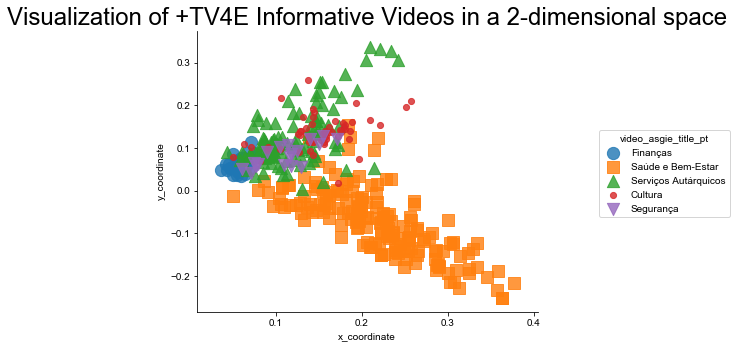

In [20]:
# plot!
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot("x_coordinate", "y_coordinate", hue="video_asgie_title_pt", data=df_videos, fit_reg=False, markers=markers_list, scatter_kws={"s": 150})
# Adjust borders and add title
sns.set(font_scale=2)
plt.title('Visualization of +TV4E Informative Videos in a 2-dimensional space')
plt.subplots_adjust(right=0.80, top=0.90, left=0.12, bottom=0.12)
# Show plot
plt.show()